# Develop packages with Julia 1.0.3 

Julia 1.0.3 is the first long time stable version of julia programming languge, the official website says that all the further release will be back compitable with Julia 1.0.3 I will briefly introduce the workflow I used for developing packages with julia 1.0.3

## Remove other julia version

Check your .bashrc(Linux) or .bash_profule(Mac), most people install julia by appending julia binary to the end of environment variable PATH, for example

```console
PATH=$PATH:/Applications/Julia-1.1.app/Contents/Resources/julia/bin
```

simply comment this line if you want to use other julia version

```console
#PATH=$PATH:/Applications/Julia-1.1.app/Contents/Resources/julia/bin
```

## Install Julia 1.0.3 on Mac (minor changes required for linux)

1. Download the binaries from the official [website](https://julialang.org/downloads/)
2. The Mac users usually place Julia library at the location /Applications/Julia-1.0.app (Linux users may place the library at some other places, this workflow still works).

## Add julia binary to PATH

I provide two ways to accomplish this step:
1. create a soft link
```console
SAIG:~wenlei$ ln -s /Applications/Julia-1.0.app/Contents/Resources/julia/bin/julia /usr/local/bin/julia 
```

2. Append to PATH
```console
PATH=$PATH:/Applications/Julia-1.0.app/Contents/Resources/julia/bin/julia
```
you can choose either one of them.

after this, you can acess to the julia REPL at any place just by typing julia in your command windonw, 

```console
SAIG:~wenlei$ julia
```
it will show the REPL interface like

![Screen%20Shot%202019-01-10%20at%2010.22.14%20AM.png](julia_REPL.png)

## Change mode in the julia REPL

? # change to help mode

?@time, use an example to show how to create the documentation for a customized function

; # change to bash mode

] # change to package mode


## Install a package (Registered)

let's install the plotting package *PyPlot*

```console
(v1.0) pkg> add PyPlot
```

load the package
```console
julia> using PyPlot
```

plot a vector
```console
julia> a = rand(10)
julia> plot(a)
```

I found that PyPlot doesn't work on some computeres, to fix the problems, you can try the following commands

```console
(v1.0) pkg> add Conda
julia> using Conda;
julia> Conda.add("pyqt")
```
 

## Install a non-registered package 

Suppose we want to put the non-registed julia packages under the directory $HOME/julia_packages/ 

1. change directory 

```console
$ cd $HOME/julia_packages/ 
```

2. clone the packages from github to your local machine, I use the packages in SeismicJulia as an example
```console
$ git clone https://github.com/SeismicJulia/SeisMain.jl.git
$ git clone https://github.com/SeismicJulia/SeisPlot.jl.git
$ git clone https://github.com/SeismicJulia/SeisProcessing.jl.git
$ git clone https://github.com/SeismicJulia/SeisReconstruction.jl.git
```

3. add these packages to julia under developement mode
```console
(v1.0) pkg> dev $HOME/julia_packages/SeisMain.jl
(v1.0) pkg> dev $HOME/julia_packages/SeisPlot.jl
(v1.0) pkg> dev $HOME/julia_packages/SeisProcessing.jl
(v1.0) pkg> dev $HOME/julia_packages/SeisReconstruction.jl
```

## Check the status of the packages 

```console
(v1.0) pkg> st
```

## Use these packages

```console
julia> using SeisPlot, SeisProcessing
julia> d = SeisLinearEvents()
julia> SeisPlotTX(d)
```
or you can play with julia with jupyter via the IJulia package, actually this file is generated by jupyter.

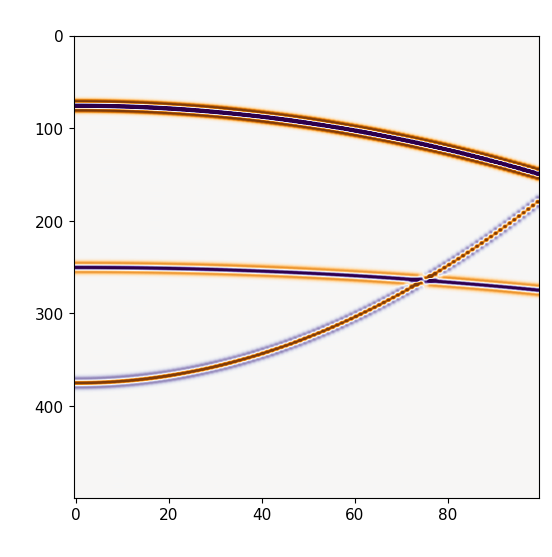

im

In [1]:
using SeisPlot, SeisProcessing
d = SeisParabEvents()
SeisPlotTX(d)

To access the doumentation of one function, say SeisPlotTX, just need to type ? in front of the function name

In [3]:
?SeisPlotTX

search: SeisPlotTX SeisPlotAmplitude SeisPlotCoordinates SeisPlotFK SeisPlot



```
SeisPlotTX(d ; <keyword arguments>)
```

Plot time-space,  2D seismic data `d` with color, wiggles or overlay.

# Arguments

  * `d::Array{Real,2}`: 2D data to plot.

# Keyword arguments

  * `style="color"`: style of the plot: `"color"`, `"wiggles"` or `"overlay"`.
  * `cmap="PuOr"`: colormap for  `"color"` or `"overlay"` style.
  * `pclip=98`: percentile for determining clip.
  * `vmin="NULL"`: minimum value used in colormapping data.
  * `vmax="NULL"`: maximum value used in colormapping data.
  * `aspect="auto"`: color image aspect ratio.
  * `interpolation="Hanning"`: interpolation method for colormapping data.
  * `wiggle_fill_color="k"`: color for filling the positive wiggles.
  * `wiggle_line_color="k"`: color for wiggles' lines.
  * `wiggle_trace_increment=1`: increment for wiggle traces.
  * `xcur=1.2`: wiggle excursion in traces corresponding to clip.
  * `scal="NULL"`: scale for wiggles.
  * `title=" "`: title of plot.
  * `titlesize=16`: size of title.
  * `xlabel=" "`: label on x-axis.
  * `xunits=" "`: units of y-axis.
  * `ylabel=" "`: label on x-axis.
  * `yunits=" "`: units of y-axis.
  * `labelsize=14`: size of labels on axis.
  * `ox=0`: first point of x-axis.
  * `dx=1`: increment of x-axis.
  * `oy=0`: first point of y-axis.
  * `dy=1`: increment of y-axis.
  * `xticks="NULL"`: ticks on x-axis.
  * `yticks="NULL"`: ticks on y-axis.
  * `xticklabels="NULL"`: labels on ticks of x-axis.
  * `yticklabels="NULL"`: labels on ticks of y-axis.
  * `ticksize=11`: size of labels on ticks.
  * `fignum="NULL"`: number of figure.
  * `wbox=6`: width of figure in inches.
  * `hbox=6`: height of figure in inches.
  * `dpi=100`: dots-per-inch of figure.
  * `name="NULL"`: name of the figure to save (only if `name` is given).

# Example

```julia
julia> d = SeisLinearEvents(); SeisPlotTX(d);
```

Credits: Aaron Stanton, 2015


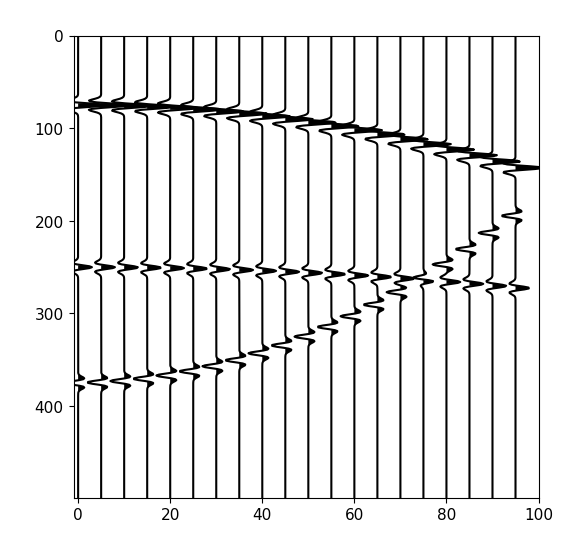

im

In [6]:
# plotting the data in wiggle
SeisPlotTX(d, style="wiggles", wiggle_trace_increment=5)

## Develop packages in Julia 1.0

Suppose I want to develop a new package called **my_package** and place it at the Desktop of my computer. 

1. change the working directory to Desktop

```console
julia> cd("/Users/wenlei/Desktop") 
```

2. change to package mode by typing ], generate a new packge named as **my_package**

```console
(v1.0) pkg> generate my_package
```

3. add this package as a developing package to julia 1.0

```console
(v1.0) pkg> dev my_package
```

4. At this stage, we can call the built-in function "greet" provided by **my_package**, we first need to get out of package mode by typing backspace or delete

```console
julia> using my_package
julia> my_package.greet()
```

it will show 

```console
Hello World!
```

## Add functions which depends on external packages  

Suppose we want to develop two functions **my_svd** and **my_fft**, these two functions depend on external package **LinearAlgebra** and **FFTW**, respectively. The source code of my_package.jl is provided as follow

```julia
module my_package

using LinearAlgebra, FFTW

export my_svd,
       my_dft


greet() = print("Hello World!") # greet is not exported, so we need to access it by my_package.greet()

function my_svd(d::Matrix{T}) where {T<:Number}

    (u, s, v) = svd(d) # svd is provided by LinearAlgebra
    return u, s, v
end

function my_dft(d::Vector{T}) where {T<:Number}
    return fft(d) # fft is provided by FFTW
end

end # module
```

to use the two packages, we need to install them via

```console
(v1.0) Pkg > add LinearAlgebra FFTW
```

Create the dependence of **my_package** on **LinearAlgebra** and **FFTW**, to ahieve this goal, we first need to activate the environment of **my_package** by

```console
(v1.0) Pkg > activate my_package
```

```console
(my_package) Pkg > add LinearAlgebra FFTW
```

the content in the bracket indicate which environment you are working on. To finalize the dependencies change, we also need to resolve the dependecy changes for julia REPL by

```console
(my_package) Pkg > activate v1.0
(v1.0) Pkg > resolve()
```

## Use my_package

```console
SAIG:~wenlei$ julia
```

```julia
julia> using my_package
julia> d = rand(5,3)
julia> (u, s, v) = my_svd(d)
julia> a = rand(10)
julia> Fa= my_dft(a)
```

## Recommand reading 

The main difference between julia 1.0 and julia 0.6 is the package manager, I strongly suggest to read the documentation about [Pkg](https://docs.julialang.org/en/v1/stdlib/Pkg/).